In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('E:\SnehaWork\AIProject\Dataset\Customer-Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [3]:
Churned = df[df.Churn == 'Yes']
NonChurned = df[df.Churn == 'No']

number_of_Churned = len(Churned)
number_of_NonChurned = len(NonChurned)

Churned_percentage = round((number_of_Churned / (number_of_Churned + number_of_NonChurned)) * 100, 2)
valid_percentage = round((number_of_NonChurned / (number_of_Churned + number_of_NonChurned)) * 100, 2)
print(number_of_NonChurned,number_of_Churned)
df.columns.tolist()

5174 1869


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [4]:
#df.dtypes
#count yes and no on base data, train and test

In [5]:
df.drop('customerID',axis='columns',inplace=True)

In [6]:
#error='coerce' ignores the errors. Conversion for all except for error values i.e. empty spaces. 
#.isnull() gives columns which have empty spaces
#shows the data which has TotalCharges as null. Good to drop these

df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [7]:
#Drop rows with TotalCharges as null

df1 = df[df.TotalCharges!=' ']

In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [10]:
#replace Yes/No to 1/0 since ML doesn't understand text

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
df1['gender'].replace({'Male':1,'Female':0},inplace=True)

In [12]:
#One hot encoding for multiclass i.e. InternetService, Contract, PaymentMethod

multiclass_col=['InternetService', 'Contract', 'PaymentMethod']
df1 = pd.get_dummies(data=df1,columns=multiclass_col)

In [13]:
#scaling the values between 1 and 0 for below
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

#MinMaxScaler scales the data between 0 and 1
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [14]:
def print_unique_col_values(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

In [15]:
print_unique_col_values(df1)

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [16]:
#Drop churn 
x = df1.drop('Churn',axis=1)  #check axis=0/1
y = df1['Churn']
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [17]:
#test and train split. 80% for training and 20% for test

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [19]:
y_train.value_counts()

0    3329
1    1171
Name: Churn, dtype: int64

In [20]:
y_val.value_counts()

0    835
1    290
Name: Churn, dtype: int64

In [21]:
y_test.value_counts()

0    999
1    408
Name: Churn, dtype: int64

In [22]:
num_of_cols = len(x.columns)
num_of_cols

26

In [23]:
X_train=X_train.values.reshape(X_train.shape[0],num_of_cols, 1).astype('float32') 
X_test=X_test.values.reshape(X_test.shape[0],num_of_cols, 1).astype('float32')
X_val=X_val.values.reshape(X_val.shape[0],num_of_cols, 1).astype('float32')

#sometimes works as X_val.values.reshape(X_val.shape[0],26, 1).astype('float32')

In [24]:
X_test.shape

(1407, 26, 1)

In [25]:
X_val.shape

(1125, 26, 1)

In [26]:
X_train.shape

(4500, 26, 1)

In [27]:
Name = "CNN_{}".format(int(time.time())) 
log_dir="E:\\SnehaWork\\AIProject\\TF_Logs\\{}".format(Name)
cnn = models.Sequential([
    layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(26,1)),  
    layers.MaxPooling1D(pool_size=3),
    
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=3),
    
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#cnn.summary()
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=0)

cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit(X_train, y_train, validation_data=(X_val,y_val), batch_size=375,epochs=70, callbacks=[tb_callback])

Train on 4500 samples, validate on 1125 samples
Epoch 1/70
4500/4500 [==============================] - 4s 923us/sample - loss: 0.6008 - accuracy: 0.7398 - val_loss: 0.5612 - val_accuracy: 0.7422
Epoch 2/70
4500/4500 [==============================] - 1s 246us/sample - loss: 0.5563 - accuracy: 0.7398 - val_loss: 0.5390 - val_accuracy: 0.7422
Epoch 3/70
4500/4500 [==============================] - 1s 231us/sample - loss: 0.5285 - accuracy: 0.7398 - val_loss: 0.5074 - val_accuracy: 0.7422
Epoch 4/70
4500/4500 [==============================] - 1s 226us/sample - loss: 0.4905 - accuracy: 0.7420 - val_loss: 0.4691 - val_accuracy: 0.7609
Epoch 5/70
4500/4500 [==============================] - 1s 229us/sample - loss: 0.4577 - accuracy: 0.7744 - val_loss: 0.4496 - val_accuracy: 0.7884
Epoch 6/70
4500/4500 [==============================] - 1s 255us/sample - loss: 0.4416 - accuracy: 0.7900 - val_loss: 0.4377 - val_accuracy: 0.7911
Epoch 7/70
4500/4500 [==============================] - 1s 249us

In [28]:
cnn.evaluate(X_test,y_test,batch_size=375)

1407/1407 [==============================] - 0s 347us/sample - loss: 0.4575 - accuracy: 0.7818


[0.4574602220866726, 0.7818053]

In [29]:
yp = cnn.predict(X_test)
#yp[:5]

In [30]:
#converting decimal into 0 and 1
y_pred = []
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [31]:
#y_pred[:10]

In [32]:
#y_test[:10]

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.65      0.52      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[886, 113],
       [194, 214]])>

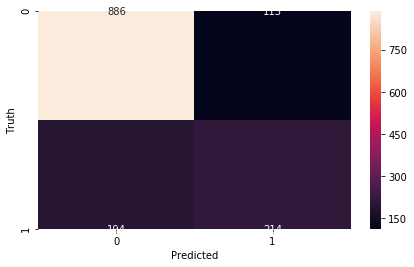

In [34]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (7,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

In [35]:
#conda install tensorboard


In [36]:
#%load_ext tensorboard
#%tensorboard --logdir log_dir
#The tensorboard extension is already loaded. To reload it, use:
#%reload_ext tensorboard

#run in cmd tensorboard --logdir='E:\SnehaWork\AIProject\TF_Logs\CNN_1626995487'
#taskkill /F /PID 15092

SMOTE

In [37]:
#conda install -c conda-forge imbalanced-learn

In [100]:
X_df = df1.drop('Churn',axis='columns')
y_df = df1['Churn']

In [105]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
X_sm_train, y_sm_train = smote.fit_resample(X_train1, y_train1)


In [106]:
X_sm_train = pd.DataFrame(X_sm_train, columns=X_df.columns)
#X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)


In [108]:
y_sm_train = pd.Series(y_sm_train)


In [116]:
X_sm_test.shape


(2066, 26, 1)

In [69]:
y_sm1.value_counts()


1    5163
0    5163
dtype: int64

In [101]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_df, y_df, test_size=0.2, random_state=15)


In [109]:
X_sm_train, X_sm_val, y_sm_train, y_sm_val = train_test_split(X_sm_train,y_sm_train,test_size=0.2,random_state=5)

In [126]:
#X_sm_train=X_sm_train.reshape(X_sm_train.shape[0],num_of_cols, 1).astype('float32') 
X_test1=X_test1.values.reshape(X_test1.shape[0],num_of_cols, 1).astype('float32')
#X_sm_val=X_sm_val.values.reshape(X_sm_val.shape[0],num_of_cols, 1).astype('float32')

#sometimes works as X_val.values.reshape(X_val.shape[0],26, 1).astype('float32')

In [127]:
X_test1.shape

(1407, 26, 1)

In [118]:
Name = "CNN_{}".format(int(time.time())) 
log_dir="E:\\SnehaWork\\AIProject\\TF_Logs\\{}".format(Name)
cnn = models.Sequential([
    layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(26,1)),  
    layers.MaxPooling1D(pool_size=3),
    
    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=3),
    
    layers.Flatten(),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

#cnn.summary()
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=0)

cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit(X_sm_train, y_sm_train, validation_data=(X_sm_val,y_sm_val), batch_size=375,epochs=300, callbacks=[tb_callback])

Train on 6596 samples, validate on 1650 samples
Epoch 1/300
6596/6596 [==============================] - 3s 513us/sample - loss: 0.6420 - accuracy: 0.6716 - val_loss: 0.5884 - val_accuracy: 0.7309
Epoch 2/300
6596/6596 [==============================] - 1s 185us/sample - loss: 0.5445 - accuracy: 0.7539 - val_loss: 0.5037 - val_accuracy: 0.7521
Epoch 3/300
6596/6596 [==============================] - 1s 187us/sample - loss: 0.4993 - accuracy: 0.7670 - val_loss: 0.4838 - val_accuracy: 0.7618
Epoch 4/300
6596/6596 [==============================] - 1s 194us/sample - loss: 0.4850 - accuracy: 0.7727 - val_loss: 0.4751 - val_accuracy: 0.7648
Epoch 5/300
6596/6596 [==============================] - 1s 200us/sample - loss: 0.4778 - accuracy: 0.7758 - val_loss: 0.4838 - val_accuracy: 0.7697
Epoch 6/300
6596/6596 [==============================] - 1s 224us/sample - loss: 0.4781 - accuracy: 0.7735 - val_loss: 0.4632 - val_accuracy: 0.7691
Epoch 7/300
6596/6596 [==============================] - 1

Epoch 54/300
6596/6596 [==============================] - 1s 192us/sample - loss: 0.3258 - accuracy: 0.8563 - val_loss: 0.3741 - val_accuracy: 0.8303
Epoch 55/300
6596/6596 [==============================] - 1s 204us/sample - loss: 0.3250 - accuracy: 0.8532 - val_loss: 0.3762 - val_accuracy: 0.8285
Epoch 56/300
6596/6596 [==============================] - 1s 193us/sample - loss: 0.3296 - accuracy: 0.8529 - val_loss: 0.3769 - val_accuracy: 0.8291
Epoch 57/300
6596/6596 [==============================] - 1s 218us/sample - loss: 0.3285 - accuracy: 0.8552 - val_loss: 0.3840 - val_accuracy: 0.8230
Epoch 58/300
6596/6596 [==============================] - 1s 220us/sample - loss: 0.3216 - accuracy: 0.8525 - val_loss: 0.3896 - val_accuracy: 0.8109
Epoch 59/300
6596/6596 [==============================] - 1s 186us/sample - loss: 0.3259 - accuracy: 0.8551 - val_loss: 0.3801 - val_accuracy: 0.8188
Epoch 60/300
6596/6596 [==============================] - 2s 234us/sample - loss: 0.3353 - accuracy:

6596/6596 [==============================] - 1s 175us/sample - loss: 0.2493 - accuracy: 0.8881 - val_loss: 0.3838 - val_accuracy: 0.8364
Epoch 163/300
6596/6596 [==============================] - 2s 236us/sample - loss: 0.2389 - accuracy: 0.9002 - val_loss: 0.3813 - val_accuracy: 0.8327
Epoch 164/300
6596/6596 [==============================] - 1s 225us/sample - loss: 0.2373 - accuracy: 0.8984 - val_loss: 0.4008 - val_accuracy: 0.8200
Epoch 165/300
6596/6596 [==============================] - 1s 167us/sample - loss: 0.2442 - accuracy: 0.8934 - val_loss: 0.3768 - val_accuracy: 0.8400
Epoch 166/300
6596/6596 [==============================] - 1s 173us/sample - loss: 0.2478 - accuracy: 0.8911 - val_loss: 0.4440 - val_accuracy: 0.8145
Epoch 167/300
6596/6596 [==============================] - 1s 182us/sample - loss: 0.2520 - accuracy: 0.8864 - val_loss: 0.4040 - val_accuracy: 0.8297
Epoch 168/300
6596/6596 [==============================] - 1s 191us/sample - loss: 0.2526 - accuracy: 0.8858

6596/6596 [==============================] - 1s 192us/sample - loss: 0.2007 - accuracy: 0.9119 - val_loss: 0.4524 - val_accuracy: 0.8127
Epoch 271/300
6596/6596 [==============================] - 1s 177us/sample - loss: 0.1955 - accuracy: 0.9193 - val_loss: 0.4639 - val_accuracy: 0.8194
Epoch 272/300
6596/6596 [==============================] - 1s 171us/sample - loss: 0.2163 - accuracy: 0.9031 - val_loss: 0.4685 - val_accuracy: 0.8255
Epoch 273/300
6596/6596 [==============================] - 1s 170us/sample - loss: 0.2001 - accuracy: 0.9116 - val_loss: 0.4537 - val_accuracy: 0.8164
Epoch 274/300
6596/6596 [==============================] - 1s 172us/sample - loss: 0.1997 - accuracy: 0.9109 - val_loss: 0.4327 - val_accuracy: 0.8291
Epoch 275/300
6596/6596 [==============================] - 1s 170us/sample - loss: 0.2138 - accuracy: 0.9086 - val_loss: 0.4871 - val_accuracy: 0.8152
Epoch 276/300
6596/6596 [==============================] - 1s 173us/sample - loss: 0.1978 - accuracy: 0.9143

In [130]:
cnn.evaluate(X_test,y_test)

1407/1407 [==============================] - 0s 100us/sample - loss: 0.3814 - accuracy: 0.8515


[0.38143863617399526, 0.851457]

In [132]:
yp_sm = cnn.predict(X_test,y_test)


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [80]:
#converting decimal into 0 and 1
y_pred_sm = []
for i in yp_sm:
    if i>0.5:
        y_pred_sm.append(1)
    else:
        y_pred_sm.append(0)

In [1]:
print(classification_report(y_sm_test,y_pred_sm))

NameError: name 'classification_report' is not defined

In [92]:
%load_ext tensorboard
%tensorboard --logdir log_dir

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 15092), started 7 days, 4:34:10 ago. (Use '!kill 15092' to kill it.)